In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

## Import processed data

In [2]:
folder_processed_data_path = './data/processed_data/'

movie_df = pd.read_csv(os.path.join(folder_processed_data_path, 'movie_df.csv'))
movie_df.set_index(['wiki_ID'], inplace=True)
# Verify the indexes are unique
print(f"Is the indexing unique in movie_df ? {movie_df.index.is_unique}")

name_by_movie_ordered_df = pd.read_csv(os.path.join(folder_processed_data_path, 'name_by_movie_ordered_df.csv'))
# Verify the indexes are unique
print(f"Is the indexing unique in name_by_movie_df ? {name_by_movie_ordered_df.index.is_unique}")

baby_name_df = pd.read_csv(os.path.join(folder_processed_data_path, 'baby_name_df.csv'))
baby_name_df.set_index(['name', 'year'], inplace=True)
# Verify the indexes are unique
print(f"Is the indexing unique in baby_name_df ? {baby_name_df.index.is_unique}")

print("movie_df :")
display(movie_df.head())
print("name_by_movie_ordered_df :")
display(name_by_movie_ordered_df.head())
print("baby_name_df :")
display(baby_name_df.head())

Is the indexing unique in movie_df ? True
Is the indexing unique in name_by_movie_df ? True
Is the indexing unique in baby_name_df ? True
movie_df :


,mov_name,release,revenue,numVotes,averageRating
wiki_ID,,,,,
975900,Ghosts of Mars,2001,14010832.0,56880,4.9
3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,69,6.0
28463795,Brun bitter,1988,NaN,40,5.6
9363483,White Of The Eye,1987,NaN,2891,6.1
261236,A Woman in Flames,1983,NaN,623,5.9


name_by_movie_ordered_df :


,wiki_ID,char_words,order,gender
0,3217,Gold,6.0,NaN
1,3217,Linda,7.0,F
2,3217,Henry,4.0,M
3,3217,Duke,4.0,M
4,3217,Warrior,9.0,M


baby_name_df :


,,number,percentage
name,year,,
Aaban,2007,5,0.000125
Aadam,2007,8,0.000200
Aadan,2007,8,0.000200
Aadarsh,2007,13,0.000325
Aaden,2007,157,0.003928


Choices :

In [3]:
movie_df.query("mov_name == 'The Godfather'")

,mov_name,release,revenue,numVotes,averageRating
wiki_ID,,,,,
2466773,The Godfather,1972,268500000.0,1962006,9.2


In [4]:
name_by_movie_ordered_df[name_by_movie_ordered_df['wiki_ID'] == 2466773]

,wiki_ID,char_words,order,gender
45440,2466773,Vito,0.0,M
45441,2466773,Michael,1.0,F
45442,2466773,Joe,NaN,M
45443,2466773,Greene,21.0,M
45444,2466773,Luca,17.0,M
45445,2466773,Fredo,13.0,M
45446,2466773,Pete,NaN,M
45447,2466773,Corleone,6.0,F
45448,2466773,Baker,NaN,M
45449,2466773,Adams,5.0,F


In [5]:
nb_year_after = 5
nb_year_before = 10

chosen_movie_ID = 2466773
chosen_name = 'Vito'

print(f"The chosen movie is {movie_df.loc[chosen_movie_ID]['mov_name']} in {movie_df.loc[chosen_movie_ID]['release']}")

The chosen movie is The Godfather in 1972


In [6]:
chosen_baby_name_df = baby_name_df.loc[chosen_name].sort_values(by=['year'])
display(chosen_baby_name_df.head())

,number,percentage
year,,
1898,5,0.001311
1900,6,0.001333
1901,7,0.002024
1902,16,0.004137
1904,11,0.002726


In [7]:
# get the release date
release_year = movie_df.loc[chosen_movie_ID]['release']
print(f"release year = {release_year}")

release year = 1972


In [8]:
before_df = chosen_baby_name_df[(chosen_baby_name_df.index >= release_year-nb_year_before) & (chosen_baby_name_df.index <= release_year-1)].reset_index()
after_df = chosen_baby_name_df[(chosen_baby_name_df.index >= release_year) & (chosen_baby_name_df.index <= release_year+nb_year_after-1)].reset_index()
display(before_df)
display(after_df)

,year,number,percentage
0,1962,159,0.003940
1,1963,153,0.003865
2,1964,162,0.004167
3,1965,122,0.003365
4,1966,125,0.003596
5,1967,117,0.003446
6,1968,119,0.003522
7,1969,134,0.003855
8,1970,124,0.003438
9,1971,137,0.003991


,year,number,percentage
0,1972,123,0.003913
1,1973,120,0.003977
2,1974,106,0.003487
3,1975,119,0.003941
4,1976,110,0.003625


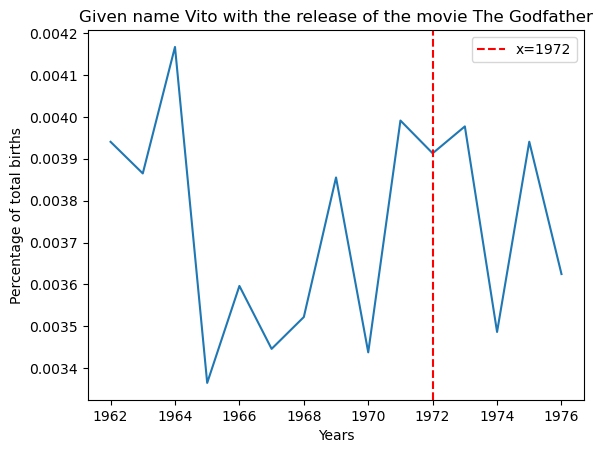

In [9]:
union_before_after_df = pd.concat([before_df, after_df], ignore_index=True)

x_values = union_before_after_df['year'].values
y_values = union_before_after_df['percentage'].values

# Create a scatter plot
plt.plot(x_values, y_values)
plt.xlabel('Years')
plt.ylabel('Percentage of total births')
plt.title(f'Given name {chosen_name} with the release of the movie {movie_df.loc[chosen_movie_ID].mov_name}')

# Draw vertical lines for each movie release
plt.axvline(x=release_year, color='r', linestyle='--', label=f'x={release_year}')
plt.legend()

plt.show()

In [10]:
import statsmodels.formula.api as smf

# model before release
mod_before = smf.ols(formula = 'percentage ~ year' , data = before_df)
np.random.seed(2)
res_before = mod_before.fit()
display(res_before.summary())

coefficients_before = res_before.params.values
beta_before = coefficients_before[1]
intercept_before = coefficients_before[0]


# model after release
mod_after = smf.ols(formula = 'percentage ~ year' , data = after_df)
res_after = mod_after.fit()
display(res_after.summary())

coefficients_after = res_after.params.values
beta_after = coefficients_after[1]
intercept_after = coefficients_after[0]

print(f"beta_before = {beta_before}")
print(f"beta_after = {beta_after}")
print(f"intercept_before = {intercept_before}")
print(f"intercept_after = {intercept_after}")

c:\Users\m_the\anaconda3\envs\ada\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percentage   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                 -0.055
Method:                 Least Squares   F-statistic:                    0.5271
Date:                Fri, 17 Nov 2023   Prob (F-statistic):              0.489
Time:                        19:27:56   Log-Likelihood:                 68.530
No. Observations:                  10   AIC:                            -133.1
Df Residuals:                       8   BIC:                            -132.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0486      0.062      0.786      0.454      -0.094       0.191
year       -2.284e-05   3.15e-05     -0.726      0.489   -9.54e-05    4.97e-05
==============================================================================
Omnibus:                        1.186   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.553   Jarque-Bera (JB):                0.705
Skew:                           0.186   Prob(JB):                        0.703
Kurtosis:                       1.754   Cond. No.                     1.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

c:\Users\m_the\anaconda3\envs\ada\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percentage   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                 -0.073
Method:                 Least Squares   F-statistic:                    0.7288
Date:                Fri, 17 Nov 2023   Prob (F-statistic):              0.456
Time:                        19:27:56   Log-Likelihood:                 36.133
No. Observations:                   5   AIC:                            -68.27
Df Residuals:                       3   BIC:                            -69.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1248      0.142      0.880      0.443      -0.326       0.576
year        -6.13e-05   7.18e-05     -0.854      0.456      -0.000       0.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.430
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.405
Skew:                          -0.580   Prob(JB):                        0.817
Kurtosis:                       2.226   Cond. No.                     2.76e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

beta_before = -2.284157395594345e-05
beta_after = -6.130358419969168e-05
intercept_before = 0.04863665117476028
intercept_after = 0.12480178275195586


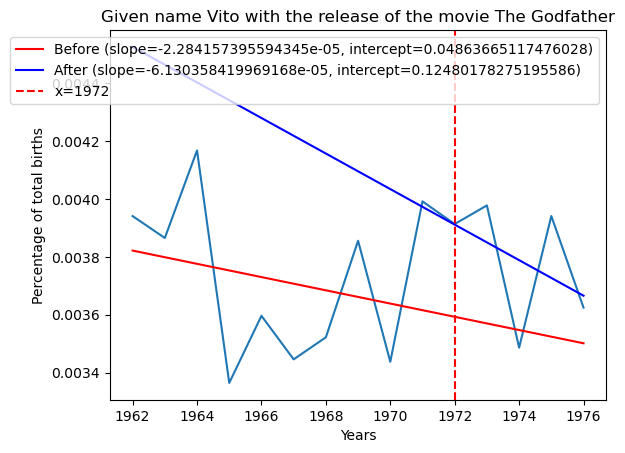

In [11]:
union_before_after_df = pd.concat([before_df, after_df], ignore_index=True)

x_values = union_before_after_df['year'].values
y_values = union_before_after_df['percentage'].values

# Create a scatter plot
plt.plot(x_values, y_values)
plt.xlabel('Years')
plt.ylabel('Percentage of total births')
plt.title(f'Given name {chosen_name} with the release of the movie {movie_df.loc[chosen_movie_ID].mov_name}')

# Calculate y values for the regression lines
reg_before = beta_before * x_values + intercept_before
reg_after = beta_after * x_values + intercept_after
# Plot the regression lines
plt.plot(x_values, reg_before, label=f'Before (slope={beta_before}, intercept={intercept_before})', color='red')
plt.plot(x_values, reg_after, label=f'After (slope={beta_after}, intercept={intercept_after})', color='blue')

# Draw vertical lines for each movie release
plt.axvline(x=release_year, color='r', linestyle='--', label=f'x={release_year}')
plt.legend()

plt.show()

In [12]:
### Testing
from scipy.stats import t

# Beta_before and Beta_after are the coefficients we want to compare

# Calculate the standard errors of the coefficients
se_before = res_before.bse[1]  # Standard error for Beta_before
se_after = res_after.bse[1]    # Standard error for Beta_after

# Calculate the t-statistic for the difference between the coefficients
t_statistic = (beta_before - beta_after) / np.sqrt(se_before**2 + se_after**2)

# Degrees of freedom
degree_freedom = len(before_df) + len(after_df) - 2  # Total sample size - number of parameters

# Two-tailed t-test for the difference between coefficients
p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df=degree_freedom))

# Print the t-statistic and p-value
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Check if the difference is statistically significant at 5% level
if p_value < 0.05:
    print("The difference is statistically significant at 5% level.")
else:
    print("There is no significant difference between the coefficients.")

t-statistic: 0.49060028184388454
p-value: 0.6318860377071418
There is no significant difference between the coefficients.


# Another way to do the t-test

In [13]:
import statsmodels.api as sm

# Assuming df_before and df_after are your datasets
# and 'time' and 'frequency' are columns in your datasets
model_before = sm.OLS(before_df['percentage'], sm.add_constant(before_df['year'])).fit()
model_after = sm.OLS(after_df['percentage'], sm.add_constant(after_df['year'])).fit()

display(model_before.summary())
display(model_after.summary())

c:\Users\m_the\anaconda3\envs\ada\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percentage   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                 -0.055
Method:                 Least Squares   F-statistic:                    0.5271
Date:                Fri, 17 Nov 2023   Prob (F-statistic):              0.489
Time:                        19:27:57   Log-Likelihood:                 68.530
No. Observations:                  10   AIC:                            -133.1
Df Residuals:                       8   BIC:                            -132.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0486      0.062      0.786      0.454      -0.094       0.191
year       -2.284e-05   3.15e-05     -0.726      0.489   -9.54e-05    4.97e-05
==============================================================================
Omnibus:                        1.186   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.553   Jarque-Bera (JB):                0.705
Skew:                           0.186   Prob(JB):                        0.703
Kurtosis:                       1.754   Cond. No.                     1.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

c:\Users\m_the\anaconda3\envs\ada\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percentage   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                 -0.073
Method:                 Least Squares   F-statistic:                    0.7288
Date:                Fri, 17 Nov 2023   Prob (F-statistic):              0.456
Time:                        19:27:57   Log-Likelihood:                 36.133
No. Observations:                   5   AIC:                            -68.27
Df Residuals:                       3   BIC:                            -69.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1248      0.142      0.880      0.443      -0.326       0.576
year        -6.13e-05   7.18e-05     -0.854      0.456      -0.000       0.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.430
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.405
Skew:                          -0.580   Prob(JB):                        0.817
Kurtosis:                       2.226   Cond. No.                     2.76e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
para_values_before = model_before.params.values
intercept_dany_before = para_values_before[0]
beta_dany_before = para_values_before[1]

para_values_after = model_after.params.values
intercept_dany_after = para_values_after[0]
beta_dany_after = para_values_after[1]

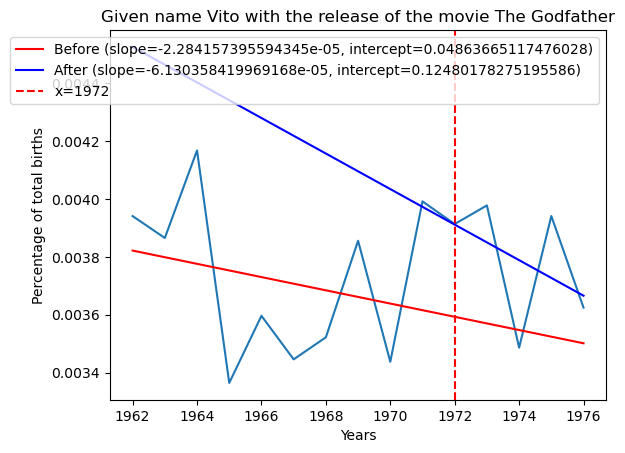

In [15]:
union_before_after_df = pd.concat([before_df, after_df], ignore_index=True)

x_values = union_before_after_df['year'].values
y_values = union_before_after_df['percentage'].values

# Create a scatter plot
plt.plot(x_values, y_values)
plt.xlabel('Years')
plt.ylabel('Percentage of total births')
plt.title(f'Given name {chosen_name} with the release of the movie {movie_df.loc[chosen_movie_ID].mov_name}')

# Calculate y values for the regression lines
reg_before = beta_dany_before * x_values + intercept_dany_before
reg_after = beta_dany_after * x_values + intercept_dany_after
# Plot the regression lines
plt.plot(x_values, reg_before, label=f'Before (slope={beta_dany_before}, intercept={intercept_dany_before})', color='red')
plt.plot(x_values, reg_after, label=f'After (slope={beta_dany_after}, intercept={intercept_dany_after})', color='blue')

# Draw vertical lines for each movie release
plt.axvline(x=release_year, color='r', linestyle='--', label=f'x={release_year}')
plt.legend()

plt.show()

In [16]:
from scipy import stats

# Assuming you're comparing the slopes of the two regression models
t_stat, p_value = stats.ttest_ind(model_before.params, model_after.params)

print("T-statistic:", t_stat)
print("P-value:",p_value)

T-statistic: -0.5680693514866584
P-value: 0.6272612553605103


# Linkai idea

In [17]:
from scipy import stats

before_diffs = before_df['percentage'][:-1] - before_df['percentage'][1:].values
after_diffs = after_df['percentage'][:-1] - after_df['percentage'][1:].values

# Assuming you're comparing the slopes of the two regression models
t_stat, p_value = stats.ttest_ind(before_diffs, after_diffs)

print("T-statistic:", t_stat)
print("P-value:",p_value)


T-statistic: -0.3076281124586863
P-value: 0.7641115487505608


It doesn't seem to work so lets keep the other method

# Apply function to compute the p-value

In [18]:
name_by_movie_ordered_df.head()

,wiki_ID,char_words,order,gender
0,3217,Gold,6.0,NaN
1,3217,Linda,7.0,F
2,3217,Henry,4.0,M
3,3217,Duke,4.0,M
4,3217,Warrior,9.0,M


In [19]:
movie_df.head()

,mov_name,release,revenue,numVotes,averageRating
wiki_ID,,,,,
975900,Ghosts of Mars,2001,14010832.0,56880,4.9
3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,69,6.0
28463795,Brun bitter,1988,NaN,40,5.6
9363483,White Of The Eye,1987,NaN,2891,6.1
261236,A Woman in Flames,1983,NaN,623,5.9


lets check if there are wiki_ID present in the name_by_movie_df which are not in the movie_df 

In [20]:
display(name_by_movie_ordered_df.head())
name_by_movie_uniqueID = name_by_movie_ordered_df['wiki_ID'].unique()
uniqueID_in_name_by_movie_df = pd.DataFrame(name_by_movie_uniqueID, columns=['wiki_ID'])
display(uniqueID_in_name_by_movie_df.head())
display(movie_df.head())

print(f"len(uniqueID_in_name_by_movie_df) = {len(uniqueID_in_name_by_movie_df)}")
print(f"len(movie_df) = {len(movie_df)}")

# Merge the DataFrames on the common 'ID' column
merged_df = pd.merge(movie_df, uniqueID_in_name_by_movie_df, on='wiki_ID', how='outer')

print(f"len(merged_df) = {len(merged_df)}")

,wiki_ID,char_words,order,gender
0,3217,Gold,6.0,NaN
1,3217,Linda,7.0,F
2,3217,Henry,4.0,M
3,3217,Duke,4.0,M
4,3217,Warrior,9.0,M


,wiki_ID
0,3217
1,3746
2,3837
3,3947
4,4227


,mov_name,release,revenue,numVotes,averageRating
wiki_ID,,,,,
975900,Ghosts of Mars,2001,14010832.0,56880,4.9
3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,69,6.0
28463795,Brun bitter,1988,NaN,40,5.6
9363483,White Of The Eye,1987,NaN,2891,6.1
261236,A Woman in Flames,1983,NaN,623,5.9


len(uniqueID_in_name_by_movie_df) = 28197
len(movie_df) = 65503
len(merged_df) = 65503


In [21]:
# import sys

# # Save the original sys.stdout
# original_stdout = sys.stdout

# # Specify the file path where you want to save the output
# output_file_path = 'output.txt'

# # Open the file in write mode (this will overwrite the file if it already exists)
# with open(output_file_path, 'w') as f:
#     # Redirect sys.stdout to the file
#     sys.stdout = f

#     # Your code goes here, including print statements
#     print("This will be written to the file.")
#     ###################################################################################################################################
#     def apply_regression(row):
#         chosen_movie_ID = row['wiki_ID']
#         chosen_name = row['char_words']

#         if (chosen_movie_ID == np.nan) or (chosen_name == np.nan):
#             return np.nan
        
#         chosen_baby_name_df = baby_name_df.loc[chosen_name].sort_values(by=['year'])

#         release_year = movie_df.loc[chosen_movie_ID]['release']

#         if (len(chosen_baby_name_df) == 0) or (release_year == np.nan):
#             return np.nan

        
#         before_df = chosen_baby_name_df[(chosen_baby_name_df.index >= release_year-nb_year_before) & (chosen_baby_name_df.index <= release_year-1)].reset_index()
#         after_df = chosen_baby_name_df[(chosen_baby_name_df.index >= release_year) & (chosen_baby_name_df.index <= release_year+nb_year_after-1)].reset_index()
        
#         np.random.seed(2)
        
#         if (len(before_df) != nb_year_before) & (len(after_df) != nb_year_after):
#             # print("not enough datapoints : return NaN")
#             return np.nan
        
#         res_before = smf.ols(formula = 'percentage ~ year' , data = before_df).fit()
#         res_after = smf.ols(formula = 'percentage ~ year' , data = after_df).fit()
        
#         beta_before = res_before.params.values[1]
#         beta_after = res_after.params.values[1]

#         # Calculate the standard errors of the coefficients
#         se_before = res_before.bse[1]  # Standard error for Beta_before
#         se_after = res_after.bse[1]    # Standard error for Beta_after
        
#         # Calculate the t-statistic for the difference between the coefficients
#         t_statistic = (beta_before - beta_after) / np.sqrt(se_before**2 + se_after**2)

#         # Degrees of freedom
#         degree_freedom = len(before_df) + len(after_df) - 2  # Total sample size - number of parameters

#         # Two-tailed t-test for the difference between coefficients
#         p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df=degree_freedom))
        
#         print(f"Movie : {movie_df.loc[chosen_movie_ID]['mov_name']}, Name : {chosen_name}, P-VALUE = {p_value}")
#         return p_value

#     # Apply the function to create a new 'TotalIncome' column
#     name_by_movie_ordered_df['p_value'] = name_by_movie_ordered_df.apply(apply_regression, axis=1)

#     display(name_by_movie_ordered_df)
    
#     # Reset sys.stdout to the original value
#     sys.stdout = original_stdout

In [22]:
data = [(3,5,7), (2,4,6), (5,8,9)]
df = pd.DataFrame(data, columns = ['A','B','C'])

# Reurn multiple columns from apply()
def multiply(row):
   row['A1'] = row[0] * 2
   row['B1'] = row[1] * 3
   row['C1'] = row[2] * 4
   return row

df = df.apply(multiply, axis=1)
print(df)

   A  B  C  A1  B1  C1
0  3  5  7   6  15  28
1  2  4  6   4  12  24
2  5  8  9  10  24  36


In [23]:
type(df)

pandas.core.frame.DataFrame

In [24]:
# iter = 0

# nb_yr_before = 10
# nb_yr_after = 5

# # Function to calculate total income (salary + bonus)
# def apply_regression(row):
#     global iter

#     chosen_movie_ID = row['wiki_ID']
#     chosen_name = row['char_words']

#     if (chosen_movie_ID == np.nan) or (chosen_name == np.nan):
#         return np.nan
    
#     chosen_baby_name_df = baby_name_df.loc[chosen_name].sort_values(by=['year'])

#     release_year = movie_df.loc[chosen_movie_ID]['release']

#     if (len(chosen_baby_name_df) == 0) or (release_year == np.nan):
#         return np.nan

    
#     before_df = chosen_baby_name_df[(chosen_baby_name_df.index >= release_year-nb_yr_before) & (chosen_baby_name_df.index <= release_year-1)].reset_index()
#     after_df = chosen_baby_name_df[(chosen_baby_name_df.index >= release_year) & (chosen_baby_name_df.index <= release_year+nb_yr_after-1)].reset_index()
    
#     np.random.seed(2)
    
#     if (len(before_df) != nb_yr_before) or (len(after_df) != nb_yr_after):
#         # print("not enough datapoints : return NaN")
#         return np.nan
    
#     res_before = smf.ols(formula = 'percentage ~ year' , data = before_df).fit()
#     res_after = smf.ols(formula = 'percentage ~ year' , data = after_df).fit()
    
#     beta_before = res_before.params.values[1]
#     beta_after = res_after.params.values[1]

#     # Calculate the standard errors of the coefficients
#     se_before = res_before.bse[1]  # Standard error for Beta_before
#     se_after = res_after.bse[1]    # Standard error for Beta_after

#     if np.isnan(se_before) or np.isnan(se_after):
#         return np.nan
    
#     # Calculate the t-statistic for the difference between the coefficients
#     t_statistic = (beta_before - beta_after) / np.sqrt(se_before**2 + se_after**2)

#     # Degrees of freedom
#     degree_freedom = len(before_df) + len(after_df) - 2  # Total sample size - number of parameters

#     if np.isnan(t_statistic) or np.isnan(degree_freedom):
#         return np.nan

#     # Two-tailed t-test for the difference between coefficients
#     p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df=degree_freedom))
    
#     iter += 1
#     print("Batch {} of {}".format(iter, len(name_by_movie_ordered_df)), end="\r")

#     row['t_stat'] = t_statistic
#     row['p_value'] = p_value

#     # print(f"Movie ID : {chosen_movie_ID}, Name : {chosen_name}, P-VALUE = {p_value}")
#     return row

# # Apply the function to create a new 'TotalIncome' column
# name_by_movie_ordered_pvalue_df = name_by_movie_ordered_df.copy(deep=True)
# name_by_movie_ordered_pvalue_df = name_by_movie_ordered_pvalue_df.apply(apply_regression, axis=1)

# display(name_by_movie_ordered_df)

In [26]:
from scipy import stats

iter = 0

nb_yr_before = 10
nb_yr_after = 5

# Function to calculate total income (salary + bonus)
def apply_regression(row):
    global iter

    chosen_movie_ID = row['wiki_ID']
    chosen_name = row['char_words']
    
    chosen_baby_name_df = baby_name_df.loc[chosen_name].sort_values(by=['year'])

    release_year = movie_df.loc[chosen_movie_ID]['release']
    
    before_df = chosen_baby_name_df[(chosen_baby_name_df.index >= release_year-nb_yr_before) & (chosen_baby_name_df.index <= release_year-1)].reset_index()
    after_df = chosen_baby_name_df[(chosen_baby_name_df.index >= release_year) & (chosen_baby_name_df.index <= release_year+nb_yr_after-1)].reset_index()
    
    if (len(before_df) != nb_yr_before) or (len(after_df) != nb_yr_after):
        # print("not enough datapoints : return NaN")
        row['t_stat'] = np.NaN
        row['p_value'] = np.NaN
    else:
        before_diffs = before_df['percentage'][:-1] - before_df['percentage'][1:].values
        after_diffs = after_df['percentage'][:-1] - after_df['percentage'][1:].values

        # Assuming you're comparing the slopes of the two regression models
        t_stat, p_value = stats.ttest_ind(before_diffs, after_diffs)
        
        iter += 1
        print("Batch {} of {}".format(iter, len(name_by_movie_ordered_df)), end="\r")

        row['t_stat'] = t_stat
        row['p_value'] = p_value

    # print(f"Movie ID : {chosen_movie_ID}, Name : {chosen_name}, P-VALUE = {p_value}")
    return row

# Apply the function to create a new 'TotalIncome' column
name_by_movie_ordered_pvalue_df = name_by_movie_ordered_df.copy(deep=True)
name_by_movie_ordered_pvalue_df = name_by_movie_ordered_pvalue_df.apply(apply_regression, axis=1)

display(name_by_movie_ordered_pvalue_df)

,wiki_ID,char_words,order,gender,t_stat,p_value
0,3217,Gold,6.0,NaN,NaN,NaN
1,3217,Linda,7.0,F,0.429187,0.676072
2,3217,Henry,4.0,M,2.019954,0.068422
3,3217,Duke,4.0,M,-0.566260,0.582585
4,3217,Warrior,9.0,M,NaN,NaN
...,...,...,...,...,...,...
172901,37478048,Ajay,9.0,M,0.806658,0.436957
172902,37501922,Murphy,3.0,F,-1.257988,0.234444
172903,37501922,Hunter,1.0,M,7.051709,0.000021
172904,37501922,John,1.0,M,2.177768,0.052067


In [ ]:
display(name_by_movie_ordered_pvalue_df.to_frame())

In [27]:
processed_folder = './data/processed_data/'
name_by_movie_ordered_pvalue_df.to_csv(os.path.join(processed_folder, 'name_by_movie_ordered_pvalue_10_5_df.csv'), index=False)

In [32]:
significant_names = len(name_by_movie_ordered_pvalue_df[name_by_movie_ordered_pvalue_df['p_value'] <= 0.1])/len(name_by_movie_ordered_pvalue_df)
print(f"Proportion of significant character name : {significant_names}")

Proportion of significant character name : 0.13708604675372746


In [33]:
not_significant_names = len(name_by_movie_ordered_pvalue_df[name_by_movie_ordered_pvalue_df['p_value'] >= 0.05])/len(name_by_movie_ordered_pvalue_df)
print(f"Proportion of non significant character name : {not_significant_names}")

Proportion of non significant character name : 0.5928654876059825


In [34]:
nan_p_values = len(name_by_movie_ordered_pvalue_df[name_by_movie_ordered_pvalue_df['p_value'].isna()])/len(name_by_movie_ordered_pvalue_df)
print(f"Proportion of non calculated character name : {nan_p_values}")

Proportion of non calculated character name : 0.31206551536673105


In [ ]:
a+b+c